In [1]:
import torch
import os
import cv2
import sys
import mmcv
from PIL import Image
from utils.utils import draw_label_from_infer,get_random_bbox_colors
from matplotlib import pyplot as plt
os.chdir('../')
os.getcwd()

'/home/lijie/project/ITrafficSceneApplication'

In [2]:
from components.detector.objectdetector import Yolov4Detector
from components.detector.base import BaseDetector
detector = Yolov4Detector(
    device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    conf_thres=0.8,
    img_size=416,
    batch_size=1
)
def infer(detector:BaseDetector,imgs:list):
    imgs_info = [{
        'shape':img.shape
    } for img in imgs]
    input_data = {
        'imgs':imgs,
        'imgs_info':imgs_info
    }
    output = detector(**input_data)
    return output

In [21]:
video = mmcv.VideoReader('./static/data/video/大路口.mp4')


In [35]:
input_img = video[10]
h,w,c = input_img.shape
h_spilt = h // 2
w_split = w // 3
input_img = input_img[0:h_spilt,2 * w_split:,:]


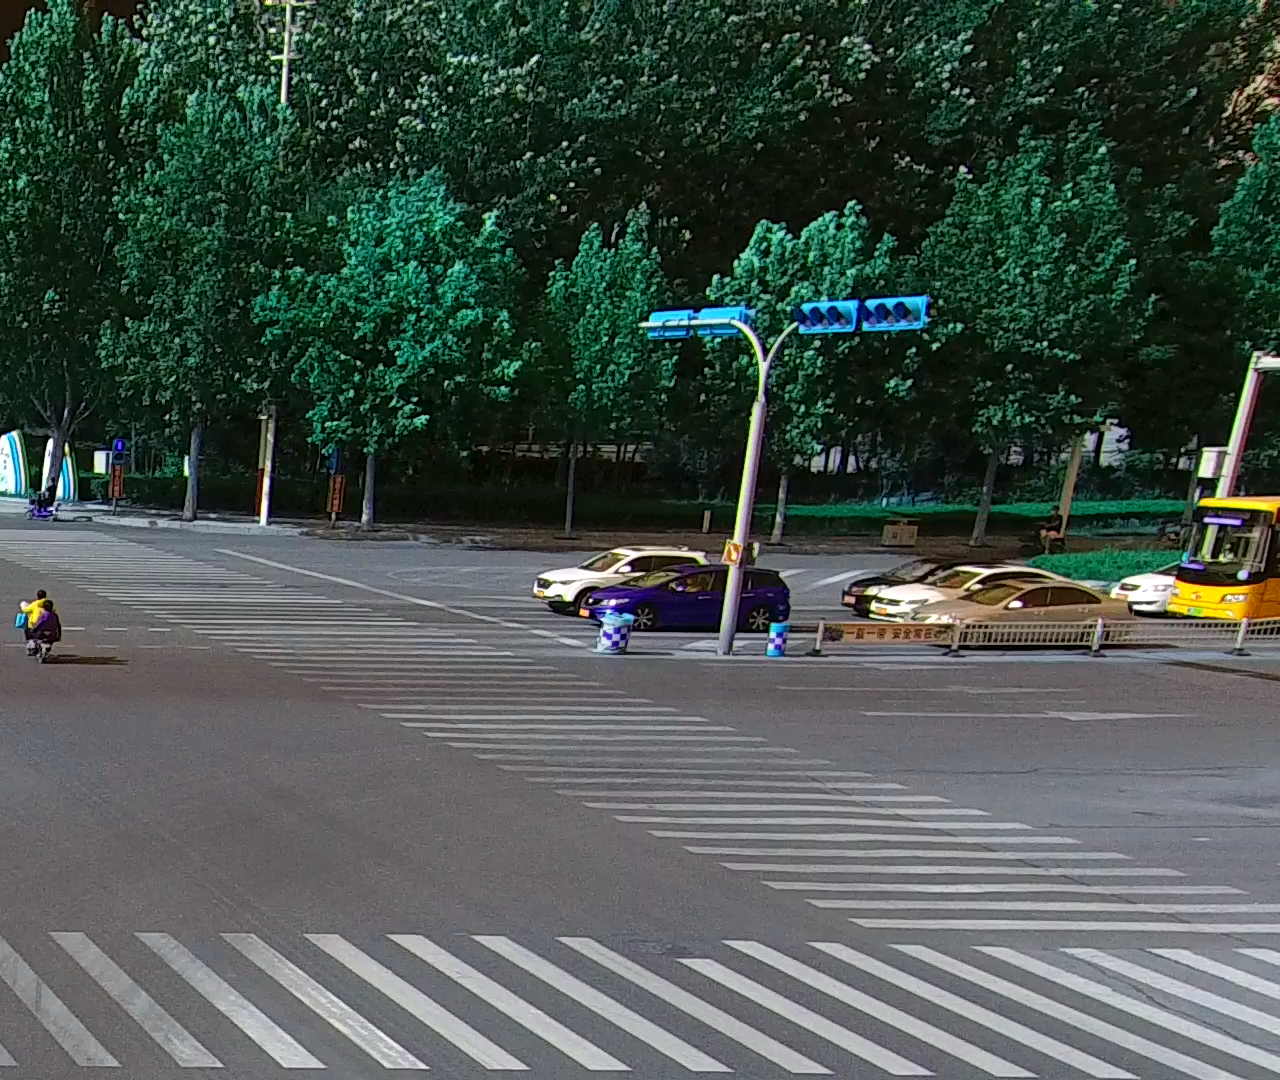

In [36]:
Image.fromarray(input_img)

In [37]:
x = infer(detector,[input_img])
results = draw_label_from_infer(x,get_random_bbox_colors())

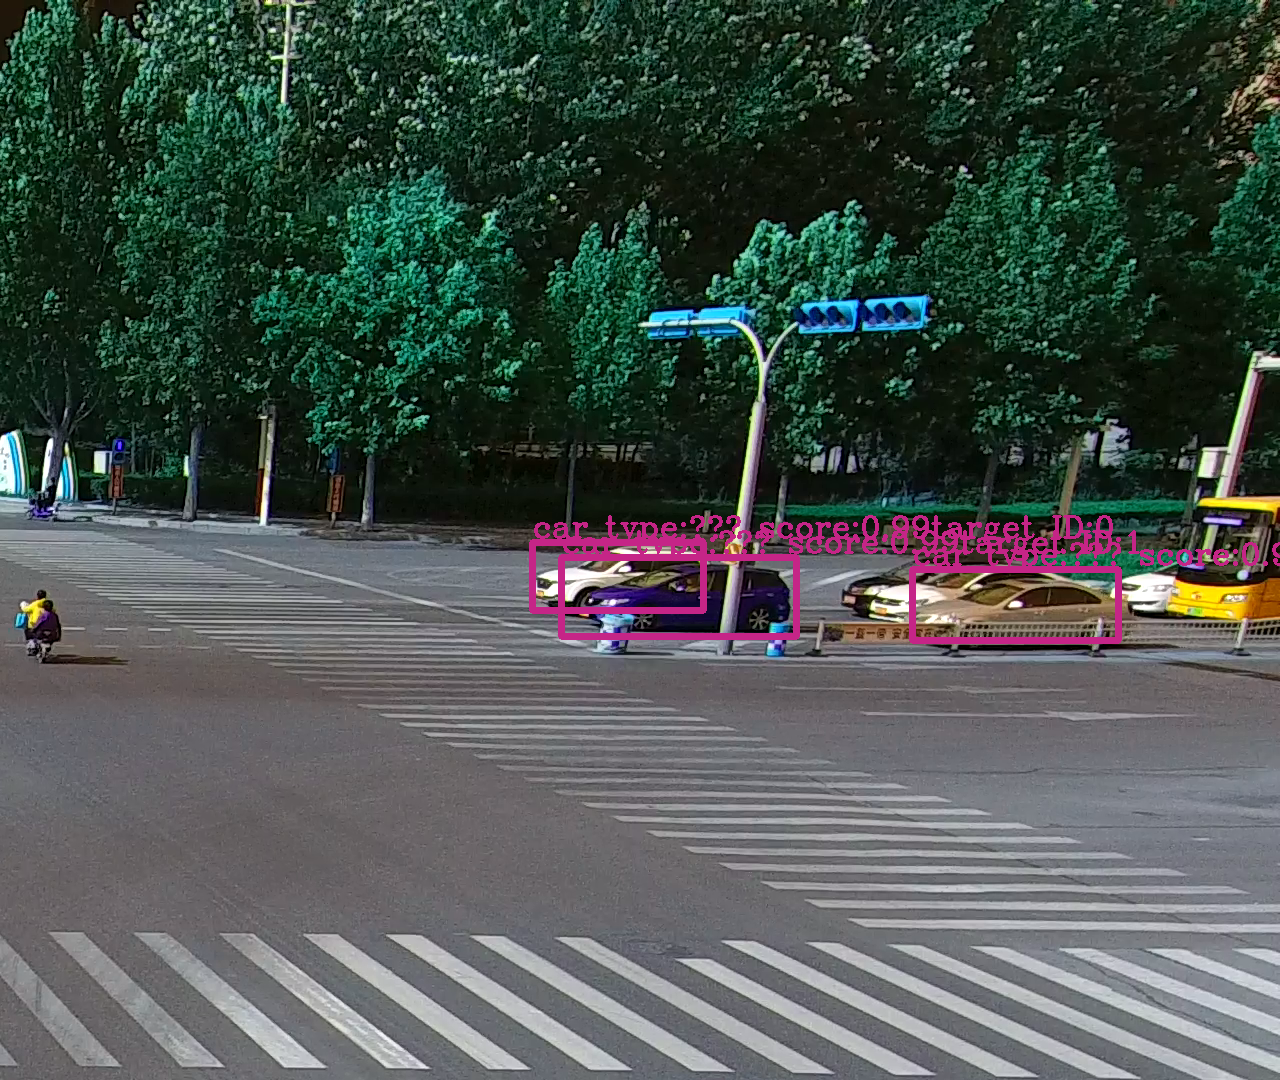

In [40]:
Image.fromarray(results[0])

In [9]:
from components.detector.yolov3 import  pad_to_square
import numpy as np
import torchvision.transforms.functional as F
def resize(img,detector_input_size=416):
    # Resize
    img_max_len = max(img.shape[:2])
    img_min_len = min(img.shape[:2])
    scale_num = img_max_len / detector_input_size
    if img.shape[0] == img_max_len:
        target_size = (int(img_min_len/scale_num),detector_input_size)
        img = cv2.resize(img,target_size)
    else:
        target_size = (detector_input_size,int(img_min_len/scale_num))
        img = cv2.resize(img,target_size)
    # Pad to square resolution
    img = F.to_tensor(img)
    # Pad to square resolution
    img, _ = pad_to_square(img, 0)
    img = img.permute((1,2,0)).numpy()
    return img
x =resize(mmcv.bgr2rgb(results[0]))